# Deep Learning for Function Estimation 

In [1]:
# CNN version
# Regression Example With wine dataset ...
import pandas as pd
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Conv1D 
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt  


In [2]:

# load dataset
dataframe = read_csv("wine_r2_t_noheader.csv" , header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]

print(X.shape)
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)


(1599, 11)
(1599, 11, 1)


In [3]:
print(dataset.shape)
dataframe.describe()


(1599, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv1D(16, 2, activation="relu", input_shape=(11,1)))
    model.add(Conv1D(12, 2, activation="relu"))
    #model.add(Dense(16, activation="relu"))
    model.add(MaxPooling1D())
    model.add(Flatten())
    #model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [5]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=400, batch_size=5, verbose=1)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print(results)

Epoch 1/400
256/256 [==============================] - 0s 532us/step - loss: 8.7928
Epoch 2/400
256/256 [==============================] - 0s 548us/step - loss: 1.4384
Epoch 3/400
256/256 [==============================] - 0s 505us/step - loss: 0.8534
Epoch 4/400
256/256 [==============================] - 0s 501us/step - loss: 0.7396
Epoch 5/400
256/256 [==============================] - 0s 501us/step - loss: 0.6950
Epoch 6/400
256/256 [==============================] - 0s 501us/step - loss: 0.6822
Epoch 7/400
256/256 [==============================] - 0s 501us/step - loss: 0.6760
Epoch 8/400
256/256 [==============================] - 0s 508us/step - loss: 0.6776
Epoch 9/400
256/256 [==============================] - 0s 497us/step - loss: 0.6521
Epoch 10/400
256/256 [==============================] - 0s 501us/step - loss: 0.6415
Epoch 11/400
256/256 [==============================] - 0s 512us/step - loss: 0.6331
Epoch 12/400
256/256 [==============================] - 0s 497us/step - lo

256/256 [==============================] - 0s 567us/step - loss: 0.5016
Epoch 98/400
256/256 [==============================] - 0s 524us/step - loss: 0.4943
Epoch 99/400
256/256 [==============================] - 0s 501us/step - loss: 0.5014
Epoch 100/400
256/256 [==============================] - 0s 505us/step - loss: 0.4976
Epoch 101/400
256/256 [==============================] - 0s 501us/step - loss: 0.4972
Epoch 102/400
256/256 [==============================] - 0s 528us/step - loss: 0.4967
Epoch 103/400
256/256 [==============================] - 0s 540us/step - loss: 0.4942
Epoch 104/400
256/256 [==============================] - 0s 575us/step - loss: 0.4945
Epoch 105/400
256/256 [==============================] - 0s 610us/step - loss: 0.4967
Epoch 106/400
256/256 [==============================] - 0s 544us/step - loss: 0.5007
Epoch 107/400
256/256 [==============================] - 0s 512us/step - loss: 0.5020
Epoch 108/400
256/256 [==============================] - 0s 505us/step

256/256 [==============================] - 0s 724us/step - loss: 0.4897
Epoch 193/400
256/256 [==============================] - 0s 598us/step - loss: 0.4733
Epoch 194/400
256/256 [==============================] - 0s 567us/step - loss: 0.4817
Epoch 195/400
256/256 [==============================] - 0s 579us/step - loss: 0.4805
Epoch 196/400
256/256 [==============================] - 0s 606us/step - loss: 0.4781
Epoch 197/400
256/256 [==============================] - 0s 626us/step - loss: 0.4750
Epoch 198/400
256/256 [==============================] - 0s 986us/step - loss: 0.4776
Epoch 199/400
256/256 [==============================] - 0s 900us/step - loss: 0.4764
Epoch 200/400
256/256 [==============================] - 0s 626us/step - loss: 0.4851
Epoch 201/400
256/256 [==============================] - 0s 802us/step - loss: 0.4782
Epoch 202/400
256/256 [==============================] - 0s 774us/step - loss: 0.4739
Epoch 203/400
256/256 [==============================] - 0s 880us/st

256/256 [==============================] - 0s 739us/step - loss: 0.4670
Epoch 288/400
256/256 [==============================] - 0s 520us/step - loss: 0.4673
Epoch 289/400
256/256 [==============================] - 0s 540us/step - loss: 0.4786
Epoch 290/400
256/256 [==============================] - 0s 536us/step - loss: 0.4712
Epoch 291/400
256/256 [==============================] - 0s 555us/step - loss: 0.4774
Epoch 292/400
256/256 [==============================] - 0s 563us/step - loss: 0.4641
Epoch 293/400
256/256 [==============================] - 0s 634us/step - loss: 0.4691
Epoch 294/400
256/256 [==============================] - 0s 649us/step - loss: 0.4759
Epoch 295/400
256/256 [==============================] - 0s 555us/step - loss: 0.4688
Epoch 296/400
256/256 [==============================] - 0s 583us/step - loss: 0.4762
Epoch 297/400
256/256 [==============================] - 0s 618us/step - loss: 0.4742
Epoch 298/400
256/256 [==============================] - 0s 598us/st

256/256 [==============================] - 1s 3ms/step - loss: 0.4675
Epoch 384/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4696
Epoch 385/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4672
Epoch 386/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4687
Epoch 387/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4613
Epoch 388/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4606
Epoch 389/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4609
Epoch 390/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4759
Epoch 391/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4679
Epoch 392/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4647
Epoch 393/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4636
Epoch 394/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4649
Epoch 

256/256 [==============================] - 1s 3ms/step - loss: 0.4749
Epoch 80/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4895
Epoch 81/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4736
Epoch 82/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4827
Epoch 83/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4698
Epoch 84/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4723
Epoch 85/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4647
Epoch 86/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4718
Epoch 87/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4686
Epoch 88/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4804
Epoch 89/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4700
Epoch 90/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4831
Epoch 91/400
256/

256/256 [==============================] - 1s 4ms/step - loss: 0.4457
Epoch 176/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4490
Epoch 177/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4520
Epoch 178/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4528
Epoch 179/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4477
Epoch 180/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4454
Epoch 181/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4544
Epoch 182/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4546
Epoch 183/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4433
Epoch 184/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4496
Epoch 185/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4548
Epoch 186/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4446A: 0s -

256/256 [==============================] - 1s 3ms/step - loss: 0.4334
Epoch 272/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4332A: 0s - loss: 0.42
Epoch 273/400
256/256 [==============================] - ETA: 0s - loss: 0.435 - 1s 2ms/step - loss: 0.4315
Epoch 274/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4266
Epoch 275/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4419
Epoch 276/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4316
Epoch 277/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4377
Epoch 278/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4331A: 0s - loss: 0.4
Epoch 279/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4328
Epoch 280/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4290A: 0s -
Epoch 281/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4355
Epoch 282/400
256/256 [=

256/256 [==============================] - 1s 3ms/step - loss: 0.4177
Epoch 368/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4245
Epoch 369/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4114
Epoch 370/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4101
Epoch 371/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4289
Epoch 372/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4143
Epoch 373/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4173
Epoch 374/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4110A: 0s - loss: 0.
Epoch 375/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4166
Epoch 376/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4156
Epoch 377/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4163
Epoch 378/400
256/256 [==============================] - 1s 4ms/step - los

256/256 [==============================] - 1s 5ms/step - loss: 0.4828A: 0s - lo - ETA: 0s - loss: 0
Epoch 63/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4866
Epoch 64/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4762
Epoch 65/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4827
Epoch 66/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4836
Epoch 67/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4760
Epoch 68/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4769
Epoch 69/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4778
Epoch 70/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4770
Epoch 71/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4726
Epoch 72/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4774
Epoch 73/400
256/256 [==============================] - 1s 4ms/step - 

256/256 [==============================] - 1s 4ms/step - loss: 0.4619
Epoch 159/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4519
Epoch 160/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4565
Epoch 161/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4622
Epoch 162/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4518
Epoch 163/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4557
Epoch 164/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4573A: 0s - loss: 0
Epoch 165/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4535
Epoch 166/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4563
Epoch 167/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4493
Epoch 168/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4605
Epoch 169/400
256/256 [==============================] - 1s 2ms/step - loss

256/256 [==============================] - 1s 2ms/step - loss: 0.4459
Epoch 255/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4512A: 0s - l
Epoch 256/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4398
Epoch 257/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4463
Epoch 258/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4440
Epoch 259/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4532
Epoch 260/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4435
Epoch 261/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4453
Epoch 262/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4435
Epoch 263/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4449
Epoch 264/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4410
Epoch 265/400
256/256 [==============================] - 1s 4ms/step - loss: 0.44

256/256 [==============================] - 1s 3ms/step - loss: 0.4370
Epoch 351/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4327
Epoch 352/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4340
Epoch 353/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4331
Epoch 354/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4337A: 0s - los
Epoch 355/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4328
Epoch 356/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4364A: 0s - loss: 0
Epoch 357/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4301
Epoch 358/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4349
Epoch 359/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4319
Epoch 360/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4363
Epoch 361/400
256/256 [==============================] - 1s 3ms/

256/256 [==============================] - 1s 3ms/step - loss: 0.5271
Epoch 46/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5366
Epoch 47/400
256/256 [==============================] - 1s 4ms/step - loss: 0.5316A: 0s 
Epoch 48/400
256/256 [==============================] - 1s 4ms/step - loss: 0.5296
Epoch 49/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5311
Epoch 50/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5216
Epoch 51/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5234
Epoch 52/400
256/256 [==============================] - 1s 4ms/step - loss: 0.5249
Epoch 53/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5284
Epoch 54/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5391
Epoch 55/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5253A: 0s - loss: 0
Epoch 56/400
256/256 [==============================] - 1s 4ms/step - loss: 0.5

256/256 [==============================] - 1s 3ms/step - loss: 0.5023
Epoch 142/400
256/256 [==============================] - 1s 2ms/step - loss: 0.5051
Epoch 143/400
256/256 [==============================] - 1s 2ms/step - loss: 0.5002
Epoch 144/400
256/256 [==============================] - 1s 2ms/step - loss: 0.5173
Epoch 145/400
256/256 [==============================] - 1s 2ms/step - loss: 0.5046A: 0s - loss
Epoch 146/400
256/256 [==============================] - 1s 2ms/step - loss: 0.5022
Epoch 147/400
256/256 [==============================] - 1s 2ms/step - loss: 0.4976
Epoch 148/400
256/256 [==============================] - 1s 2ms/step - loss: 0.5033
Epoch 149/400
256/256 [==============================] - 1s 5ms/step - loss: 0.5046
Epoch 150/400
256/256 [==============================] - 1s 4ms/step - loss: 0.5030A: 0s - loss: 0.499
Epoch 151/400
256/256 [==============================] - 1s 3ms/step - loss: 0.5004A: 1s -
Epoch 152/400
256/256 [=============================

256/256 [==============================] - 1s 4ms/step - loss: 0.4539
Epoch 238/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4549
Epoch 239/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4612
Epoch 240/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4513
Epoch 241/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4532A: 0s - loss: - ETA: 0s - loss: 0.46
Epoch 242/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4486
Epoch 243/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4566
Epoch 244/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4578
Epoch 245/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4535
Epoch 246/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4575
Epoch 247/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4551
Epoch 248/400
256/256 [==============================]

256/256 [==============================] - 1s 3ms/step - loss: 0.4401
Epoch 334/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4384
Epoch 335/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4359
Epoch 336/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4438
Epoch 337/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4394
Epoch 338/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4372
Epoch 339/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4381
Epoch 340/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4390
Epoch 341/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4407
Epoch 342/400
256/256 [==============================] - 1s 4ms/step - loss: 0.4391
Epoch 343/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4333
Epoch 344/400
256/256 [==============================] - 1s 3ms/step - loss: 0.4383
Epoch 

256/256 [==============================] - 0s 497us/step - loss: 0.5934
Epoch 30/400
256/256 [==============================] - 0s 501us/step - loss: 0.5862
Epoch 31/400
256/256 [==============================] - 0s 501us/step - loss: 0.5818
Epoch 32/400
256/256 [==============================] - 0s 532us/step - loss: 0.5821
Epoch 33/400
256/256 [==============================] - 0s 515us/step - loss: 0.5932
Epoch 34/400
256/256 [==============================] - 0s 501us/step - loss: 0.5725
Epoch 35/400
256/256 [==============================] - 0s 508us/step - loss: 0.5805
Epoch 36/400
256/256 [==============================] - 0s 486us/step - loss: 0.5754
Epoch 37/400
256/256 [==============================] - 0s 528us/step - loss: 0.5668
Epoch 38/400
256/256 [==============================] - 0s 532us/step - loss: 0.5808
Epoch 39/400
256/256 [==============================] - 0s 555us/step - loss: 0.5635
Epoch 40/400
256/256 [==============================] - 0s 555us/step - loss: 

256/256 [==============================] - 0s 551us/step - loss: 0.4833
Epoch 126/400
256/256 [==============================] - 0s 520us/step - loss: 0.4802
Epoch 127/400
256/256 [==============================] - 0s 497us/step - loss: 0.4872
Epoch 128/400
256/256 [==============================] - 0s 512us/step - loss: 0.4799
Epoch 129/400
256/256 [==============================] - 0s 505us/step - loss: 0.4818
Epoch 130/400
256/256 [==============================] - 0s 532us/step - loss: 0.4772
Epoch 131/400
256/256 [==============================] - 0s 536us/step - loss: 0.4735
Epoch 132/400
256/256 [==============================] - 0s 540us/step - loss: 0.4780
Epoch 133/400
256/256 [==============================] - 0s 519us/step - loss: 0.4728
Epoch 134/400
256/256 [==============================] - 0s 481us/step - loss: 0.4755
Epoch 135/400
256/256 [==============================] - 0s 493us/step - loss: 0.4813
Epoch 136/400
256/256 [==============================] - 0s 485us/st

256/256 [==============================] - 0s 567us/step - loss: 0.4655
Epoch 221/400
256/256 [==============================] - 0s 485us/step - loss: 0.4655
Epoch 222/400
256/256 [==============================] - 0s 545us/step - loss: 0.4629
Epoch 223/400
256/256 [==============================] - 0s 540us/step - loss: 0.4606
Epoch 224/400
256/256 [==============================] - 0s 548us/step - loss: 0.4635
Epoch 225/400
256/256 [==============================] - 0s 563us/step - loss: 0.4647
Epoch 226/400
256/256 [==============================] - 0s 575us/step - loss: 0.4651
Epoch 227/400
256/256 [==============================] - 0s 575us/step - loss: 0.4641
Epoch 228/400
256/256 [==============================] - 0s 528us/step - loss: 0.4616
Epoch 229/400
256/256 [==============================] - 0s 573us/step - loss: 0.4608
Epoch 230/400
256/256 [==============================] - 0s 551us/step - loss: 0.4679
Epoch 231/400
256/256 [==============================] - 0s 605us/st

256/256 [==============================] - 0s 571us/step - loss: 0.4583
Epoch 316/400
256/256 [==============================] - 0s 598us/step - loss: 0.4588
Epoch 317/400
256/256 [==============================] - 0s 610us/step - loss: 0.4470
Epoch 318/400
256/256 [==============================] - 0s 649us/step - loss: 0.4527
Epoch 319/400
256/256 [==============================] - 0s 531us/step - loss: 0.4476
Epoch 320/400
256/256 [==============================] - 0s 561us/step - loss: 0.4512
Epoch 321/400
256/256 [==============================] - 0s 528us/step - loss: 0.4488
Epoch 322/400
256/256 [==============================] - 0s 669us/step - loss: 0.4508
Epoch 323/400
256/256 [==============================] - 0s 634us/step - loss: 0.4502
Epoch 324/400
256/256 [==============================] - 0s 594us/step - loss: 0.4498
Epoch 325/400
256/256 [==============================] - 0s 571us/step - loss: 0.4527
Epoch 326/400
256/256 [==============================] - 0s 583us/st

In [6]:
# 2nd test ....
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
estimator.fit(X, Y)
prediction = estimator.predict(X)

train_error =  np.abs(Y - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print('\nTraining results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/400
320/320 [==============================] - 0s 531us/step - loss: 4.7949
Epoch 2/400
320/320 [==============================] - 0s 565us/step - loss: 0.9271
Epoch 3/400
320/320 [==============================] - 0s 603us/step - loss: 0.7919
Epoch 4/400
320/320 [==============================] - 0s 594us/step - loss: 0.7022
Epoch 5/400
320/320 [==============================] - 0s 525us/step - loss: 0.6749
Epoch 6/400
320/320 [==============================] - 0s 535us/step - loss: 0.6658
Epoch 7/400
320/320 [==============================] - 0s 547us/step - loss: 0.6416
Epoch 8/400
320/320 [==============================] - 0s 588us/step - loss: 0.6161
Epoch 9/400
320/320 [==============================] - 0s 596us/step - loss: 0.6244
Epoch 10/400
320/320 [==============================] - 0s 556us/step - loss: 0.6131
Epoch 11/400
320/320 [==============================] - 0s 519us/step - loss: 0.6015
Epoch 12/400
320/320 [==============================] - 0s 543us/step - lo

320/320 [==============================] - 0s 588us/step - loss: 0.5055
Epoch 98/400
320/320 [==============================] - 0s 670us/step - loss: 0.5059
Epoch 99/400
320/320 [==============================] - 0s 716us/step - loss: 0.5079
Epoch 100/400
320/320 [==============================] - 0s 577us/step - loss: 0.5080
Epoch 101/400
320/320 [==============================] - 0s 591us/step - loss: 0.5117
Epoch 102/400
320/320 [==============================] - 0s 619us/step - loss: 0.5032
Epoch 103/400
320/320 [==============================] - 0s 644us/step - loss: 0.5104
Epoch 104/400
320/320 [==============================] - 0s 647us/step - loss: 0.5048
Epoch 105/400
320/320 [==============================] - 0s 569us/step - loss: 0.5087
Epoch 106/400
320/320 [==============================] - 0s 571us/step - loss: 0.5086
Epoch 107/400
320/320 [==============================] - 0s 584us/step - loss: 0.5062
Epoch 108/400
320/320 [==============================] - 0s 755us/step

320/320 [==============================] - 0s 710us/step - loss: 0.4672
Epoch 193/400
320/320 [==============================] - 0s 599us/step - loss: 0.4593
Epoch 194/400
320/320 [==============================] - 0s 613us/step - loss: 0.4713
Epoch 195/400
320/320 [==============================] - 0s 698us/step - loss: 0.4586
Epoch 196/400
320/320 [==============================] - 0s 732us/step - loss: 0.4571
Epoch 197/400
320/320 [==============================] - 0s 666us/step - loss: 0.4606
Epoch 198/400
320/320 [==============================] - 0s 597us/step - loss: 0.4554
Epoch 199/400
320/320 [==============================] - 0s 618us/step - loss: 0.4596
Epoch 200/400
320/320 [==============================] - 0s 714us/step - loss: 0.4552
Epoch 201/400
320/320 [==============================] - 0s 713us/step - loss: 0.4562
Epoch 202/400
320/320 [==============================] - 0s 663us/step - loss: 0.4554
Epoch 203/400
320/320 [==============================] - 0s 610us/st

320/320 [==============================] - 0s 677us/step - loss: 0.4365
Epoch 288/400
320/320 [==============================] - 0s 683us/step - loss: 0.4362
Epoch 289/400
320/320 [==============================] - 0s 641us/step - loss: 0.4330
Epoch 290/400
320/320 [==============================] - 0s 613us/step - loss: 0.4433
Epoch 291/400
320/320 [==============================] - 0s 607us/step - loss: 0.4330
Epoch 292/400
320/320 [==============================] - 0s 678us/step - loss: 0.4338
Epoch 293/400
320/320 [==============================] - 0s 682us/step - loss: 0.4331
Epoch 294/400
320/320 [==============================] - 0s 637us/step - loss: 0.4337
Epoch 295/400
320/320 [==============================] - 0s 610us/step - loss: 0.4310
Epoch 296/400
320/320 [==============================] - 0s 613us/step - loss: 0.4341
Epoch 297/400
320/320 [==============================] - 0s 657us/step - loss: 0.4395
Epoch 298/400
320/320 [==============================] - 0s 685us/st

320/320 [==============================] - 0s 729us/step - loss: 0.4232
Epoch 383/400
320/320 [==============================] - 0s 639us/step - loss: 0.4209
Epoch 384/400
320/320 [==============================] - 0s 641us/step - loss: 0.4200
Epoch 385/400
320/320 [==============================] - 0s 682us/step - loss: 0.4165
Epoch 386/400
320/320 [==============================] - 0s 713us/step - loss: 0.4170
Epoch 387/400
320/320 [==============================] - 0s 678us/step - loss: 0.4276
Epoch 388/400
320/320 [==============================] - 0s 611us/step - loss: 0.4172
Epoch 389/400
320/320 [==============================] - 0s 625us/step - loss: 0.4162
Epoch 390/400
320/320 [==============================] - 0s 701us/step - loss: 0.4258
Epoch 391/400
320/320 [==============================] - 0s 716us/step - loss: 0.4230
Epoch 392/400
320/320 [==============================] - 0s 657us/step - loss: 0.4221
Epoch 393/400
320/320 [==============================] - 0s 635us/st

In [8]:
df = pd.DataFrame({'Actual': Y, 'Predicted': prediction})
df1 = df.tail(25)
print(df1)

      Actual  Predicted
1574     6.0   5.702001
1575     6.0   6.178783
1576     6.0   6.418595
1577     6.0   5.404218
1578     6.0   5.997239
1579     5.0   5.620478
1580     6.0   5.942739
1581     5.0   5.620478
1582     5.0   5.344835
1583     5.0   5.146062
1584     7.0   6.526644
1585     6.0   5.974640
1586     6.0   6.245178
1587     6.0   5.663600
1588     6.0   5.366574
1589     5.0   5.148121
1590     6.0   5.931967
1591     6.0   5.474385
1592     6.0   6.137485
1593     6.0   5.958191
1594     5.0   5.383802
1595     6.0   5.951847
1596     6.0   6.137485
1597     5.0   5.697334
1598     6.0   6.352854


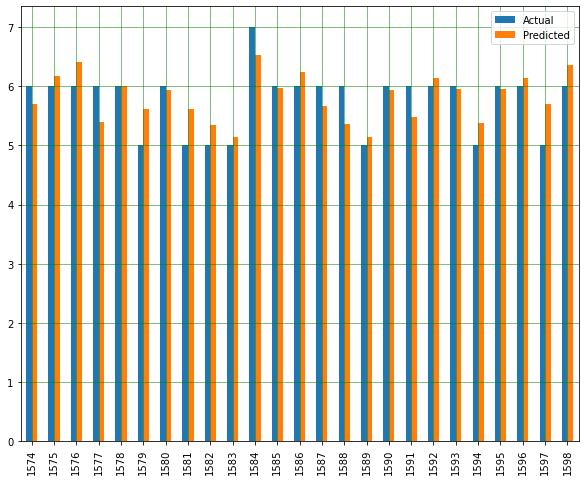

In [9]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

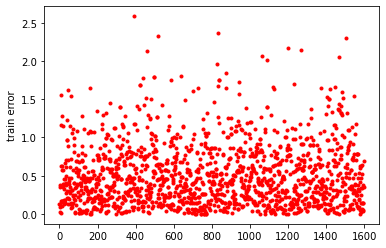

In [10]:
plt.plot(train_error,'r.')
plt.ylabel('train error')
plt.show()

In [11]:
estimator.fit(X_train, Y_train)
prediction = estimator.predict(X_test)

test_error =  np.abs(Y_test - prediction)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)
print('\nTesting results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/400
256/256 [==============================] - 0s 677us/step - loss: 9.2665
Epoch 2/400
256/256 [==============================] - 0s 700us/step - loss: 1.2152
Epoch 3/400
256/256 [==============================] - 0s 679us/step - loss: 0.9096
Epoch 4/400
256/256 [==============================] - 0s 688us/step - loss: 0.8395
Epoch 5/400
256/256 [==============================] - 0s 684us/step - loss: 0.7855
Epoch 6/400
256/256 [==============================] - 0s 677us/step - loss: 0.7703
Epoch 7/400
256/256 [==============================] - 0s 688us/step - loss: 0.7161
Epoch 8/400
256/256 [==============================] - 0s 692us/step - loss: 0.6909
Epoch 9/400
256/256 [==============================] - 0s 661us/step - loss: 0.6766
Epoch 10/400
256/256 [==============================] - 0s 688us/step - loss: 0.6833
Epoch 11/400
256/256 [==============================] - 0s 657us/step - loss: 0.6705
Epoch 12/400
256/256 [==============================] - 0s 645us/step - lo

256/256 [==============================] - 0s 683us/step - loss: 0.5011
Epoch 98/400
256/256 [==============================] - 0s 664us/step - loss: 0.4916
Epoch 99/400
256/256 [==============================] - 0s 653us/step - loss: 0.5006
Epoch 100/400
256/256 [==============================] - 0s 716us/step - loss: 0.4927
Epoch 101/400
256/256 [==============================] - 0s 688us/step - loss: 0.5054
Epoch 102/400
256/256 [==============================] - 0s 657us/step - loss: 0.4933
Epoch 103/400
256/256 [==============================] - 0s 688us/step - loss: 0.4912
Epoch 104/400
256/256 [==============================] - 0s 649us/step - loss: 0.4879
Epoch 105/400
256/256 [==============================] - 0s 683us/step - loss: 0.4862
Epoch 106/400
256/256 [==============================] - 0s 671us/step - loss: 0.4876
Epoch 107/400
256/256 [==============================] - 0s 649us/step - loss: 0.4917
Epoch 108/400
256/256 [==============================] - 0s 672us/step

256/256 [==============================] - 0s 614us/step - loss: 0.4676
Epoch 193/400
256/256 [==============================] - 0s 653us/step - loss: 0.4689
Epoch 194/400
256/256 [==============================] - 0s 634us/step - loss: 0.4646
Epoch 195/400
256/256 [==============================] - 0s 630us/step - loss: 0.4636
Epoch 196/400
256/256 [==============================] - 0s 652us/step - loss: 0.4666
Epoch 197/400
256/256 [==============================] - 0s 639us/step - loss: 0.4705
Epoch 198/400
256/256 [==============================] - 0s 622us/step - loss: 0.4632
Epoch 199/400
256/256 [==============================] - 0s 641us/step - loss: 0.4620
Epoch 200/400
256/256 [==============================] - 0s 638us/step - loss: 0.4671
Epoch 201/400
256/256 [==============================] - 0s 618us/step - loss: 0.4628
Epoch 202/400
256/256 [==============================] - 0s 657us/step - loss: 0.4656
Epoch 203/400
256/256 [==============================] - 0s 626us/st

256/256 [==============================] - 0s 649us/step - loss: 0.4569
Epoch 288/400
256/256 [==============================] - 0s 630us/step - loss: 0.4596
Epoch 289/400
256/256 [==============================] - 0s 645us/step - loss: 0.4599
Epoch 290/400
256/256 [==============================] - 0s 641us/step - loss: 0.4625
Epoch 291/400
256/256 [==============================] - 0s 649us/step - loss: 0.4628
Epoch 292/400
256/256 [==============================] - 0s 633us/step - loss: 0.4583
Epoch 293/400
256/256 [==============================] - 0s 657us/step - loss: 0.4611
Epoch 294/400
256/256 [==============================] - 0s 634us/step - loss: 0.4550
Epoch 295/400
256/256 [==============================] - 0s 630us/step - loss: 0.4573
Epoch 296/400
256/256 [==============================] - 0s 665us/step - loss: 0.4545
Epoch 297/400
256/256 [==============================] - 0s 626us/step - loss: 0.4609
Epoch 298/400
256/256 [==============================] - 0s 628us/st

256/256 [==============================] - 0s 661us/step - loss: 0.4488
Epoch 383/400
256/256 [==============================] - 0s 657us/step - loss: 0.4517
Epoch 384/400
256/256 [==============================] - 0s 644us/step - loss: 0.4507
Epoch 385/400
256/256 [==============================] - 0s 638us/step - loss: 0.4575
Epoch 386/400
256/256 [==============================] - 0s 641us/step - loss: 0.4492
Epoch 387/400
256/256 [==============================] - 0s 626us/step - loss: 0.4522
Epoch 388/400
256/256 [==============================] - 0s 638us/step - loss: 0.4563
Epoch 389/400
256/256 [==============================] - 0s 653us/step - loss: 0.4500
Epoch 390/400
256/256 [==============================] - 0s 634us/step - loss: 0.4474
Epoch 391/400
256/256 [==============================] - 0s 626us/step - loss: 0.4498
Epoch 392/400
256/256 [==============================] - 0s 641us/step - loss: 0.4518
Epoch 393/400
256/256 [==============================] - 0s 621us/st

In [12]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})
df1 = df.tail(25)
print(df1)

     Actual  Predicted
295     6.0   5.944689
296     6.0   5.469130
297     5.0   5.770518
298     6.0   5.252024
299     5.0   5.333039
300     6.0   5.421986
301     5.0   4.678885
302     6.0   5.602461
303     6.0   5.787369
304     6.0   5.659029
305     6.0   5.868670
306     5.0   5.112326
307     5.0   5.091407
308     6.0   5.866443
309     5.0   5.585603
310     5.0   5.677871
311     6.0   6.205060
312     5.0   5.729795
313     5.0   5.095974
314     5.0   5.082510
315     6.0   5.647846
316     4.0   5.474146
317     5.0   5.749755
318     4.0   5.056137
319     6.0   5.870880


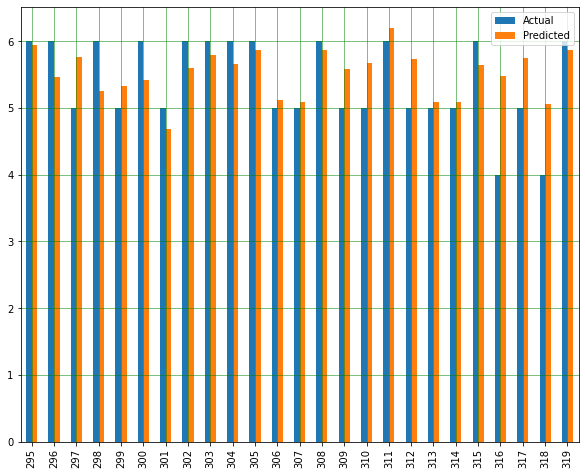

In [13]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

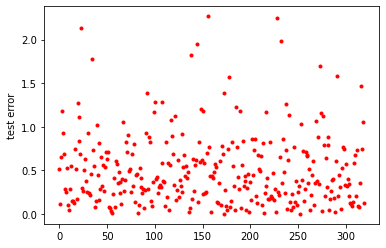

In [14]:
plt.plot(test_error,'r.')
plt.ylabel('test error')
plt.show()